(array([ 81.,  81.,  70.,  72.,  81.,  90., 109., 138., 127., 151.]),
 array([-9.49441e-01, -7.59500e-01, -5.69559e-01, -3.79618e-01,
        -1.89677e-01,  2.64000e-04,  1.90205e-01,  3.80146e-01,
         5.70087e-01,  7.60028e-01,  9.49969e-01]),
 <BarContainer object of 10 artists>)

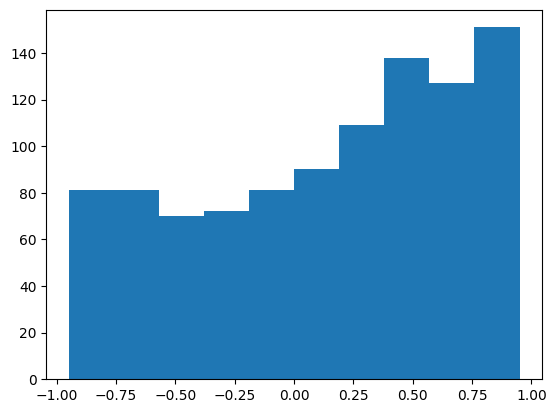

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import iminuit

# df = pd.read_csv("data_homework4.csv", header=None)
df = np.genfromtxt('data_homework4.csv')
plt.hist(df)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1330                       │              Nfcn = 38               │
│ EDM = 2.94e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬──────

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

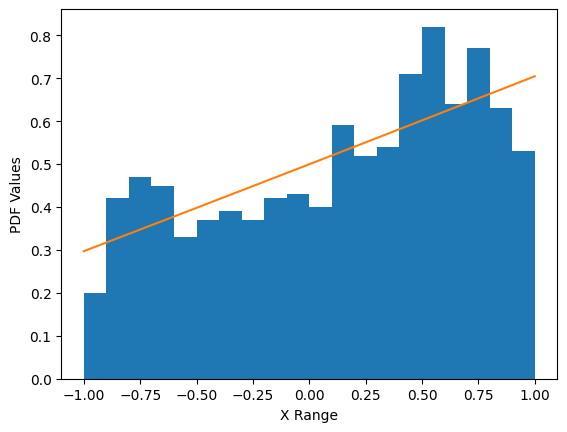

In [50]:
def pdf(x,a,b):
    x0 = 0.5 - b/3
    return x0 + a * x + b * x**2
def loglike(a,b):
    return -np.sum(np.log(pdf(df,a,b)**2))
min = iminuit.Minuit(loglike,a=0.5,b=0.5)
print(min.migrad())
plt.hist(df,bins=np.arange(-1,1.1,0.1),density=True)
xvals = np.linspace(-1,1,1000)
plt.plot(xvals,pdf(xvals,min.values['a'],min.values['b']))
plt.xlabel('X Range')
plt.ylabel('PDF Values')
print

Text(0, 0.5, 'Occurrences')

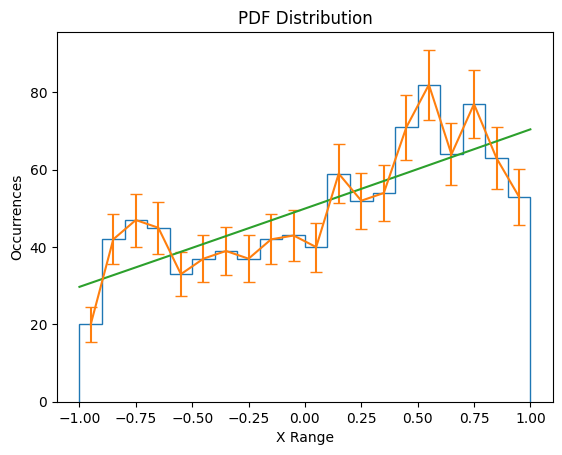

In [51]:
fita = min.values['a']
fitb = min.values['b']
counts,binedge,_ = plt.hist(df,bins=np.arange(-1,1.1,0.1),histtype='step')
bincenter = (binedge[:-1]+binedge[1:])/2
plt.errorbar(bincenter,counts,yerr=np.sqrt(counts),capsize=4)
xrange=np.linspace(-1,1,1000)
#Values taken from Migrad table
fittedpdf = [pdf(x,fita,fitb)*len(df)*0.1 for x in xrange]
plt.plot(xrange,fittedpdf)
plt.title('PDF Distribution')
plt.xlabel('X Range')
plt.ylabel('Occurrences')

In [52]:
#Needs efficiency cleanup
arng = np.linspace(-1,1,100)
brng = np.linspace(-1,1,100)
a,b = np.meshgrid(arng,brng)
negloglike = np.array([[loglike(a,b) for a in arng] for b in brng])

Text(0.5, 1.0, 'Contour Plot')

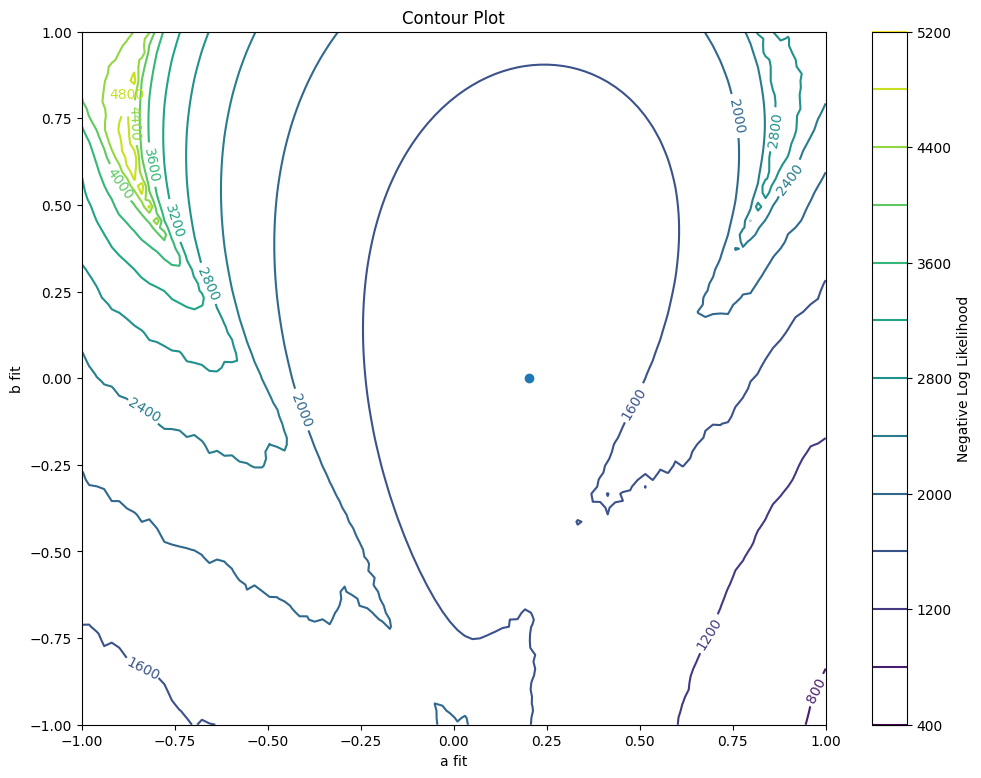

In [55]:
color, vals = plt.subplots(figsize=(12,9))
contours = vals.contour(a,b,negloglike,levels=12)
vals.scatter(fita,fitb)
vals.clabel(contours)
colbar = color.colorbar(contours,ax=vals)
colbar.set_label('Negative Log Likelihood')
vals.set_xlabel('a fit')
vals.set_ylabel('b fit')
vals.set_title('Contour Plot')